In [2]:
import wave
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.io import wavfile
from scipy.fft import fft
from tqdm import tqdm
import librosa
import librosa.display
import IPython.display as ipd

# Motivating the Mel Spectrogram

The mel spectrogram is a popular feature for AI. It's best to think of it as building on the STFT magnitude spectrum. This spectrum has its frequency represented linearly. But we do not hear pitch linearly. Consider the note pairs C2 and C4 and G6 and A6. Perceptually, the first two pairs are much further apart, but each pair of notes is seeparated by the same gap in frequency.

Generally, we would like an audio feature with the following qualities:

* Time-frequency representation

* Perceptually relevant (log scale) amplitude representation

* Perceptually relevant frequency representation

We get the first quality with the STFT. We get the second by viewing the magnitude spectrum. But we do not yet have a perceptually relevant frequency representation.

The solution to this problem is the Mel scale. The mel scale is a perceptually relevant pitch scale. Thus it is logarithmic. Equal distances between points on tthe scale have the same perceptual distance. Further, it is fixed such that 1000 Hz = 1000 mel.

The Hz-mel conversion formula is as follows:

$m = 2595 log_10(1 + \frac{f}{500})$

and its inverse:

$f = 700(10^{m}{2595})$

The general process for building a Mel Spectrogram is

1) STFT

2) Convert amplitude to dB

3) Convert frequencies to Mels

## Convert Frequencies to Mels

1) Choose the number of Mel bands

This is dependent on the problem. A mel band is essentially a range of perceptually relevant frequencies.

2) Construct Mel filter banks

Mel filters are overlapping triangular filters.

<img src='7l7SX.jpg'>

        a) Convert lowest and highest frequency to Mel.
        b) Create number n_bands number of equally spaced points between the lowest and highest frequencies.
        c) Convert those points back to Hz. These are the center frequency of each band.
        d) Round those points to the nearest frequency bins.
        e) Create triangular filters

The filter bank can be represented as a matrix M, which has shape $(n_bands, \frac{framesize}{2}+1)$. Note how the Nyquist frequency shows up as the number of columns.

3) Apply the Mel Filters.

$\text{Mel spectrogram} = MY(s, k)$

## Use Cases

Mel Spectrograms are used in audio classification, mood recognition, genre classification, music instrument classification.

# Example

Note that using librosa, you can compute the Mel Spectrogram directly from your audio signal or from the STFT spectrogram.

In [3]:
name = "C Major Chord Piano Keyboard Demo.wav"
song, sr = librosa.load(name)

In [4]:
ipd.Audio(name)

In [9]:
ms = librosa.feature.melspectrogram(y=song, sr=sr)
ms = librosa.power_to_db(ms, ref=np.max)

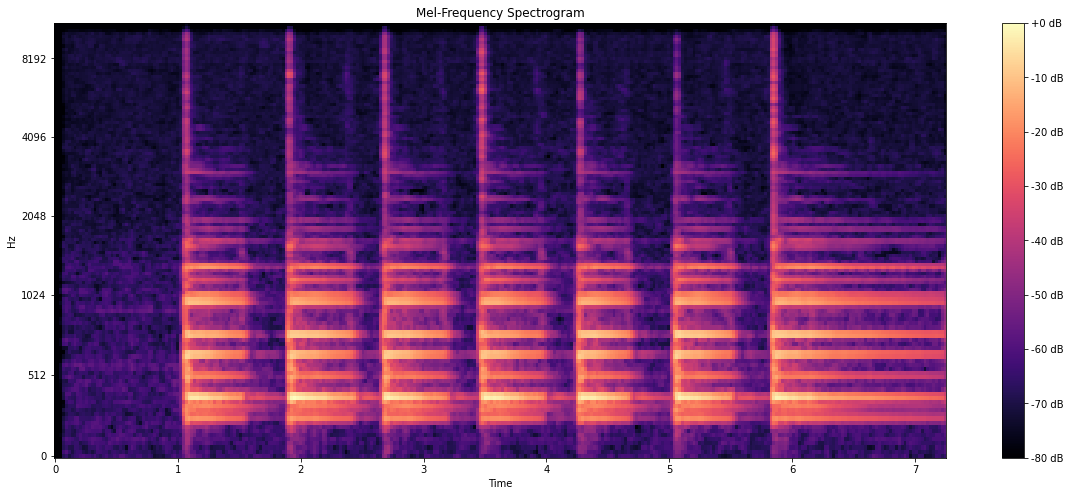

In [10]:
plt.figure(figsize=(20,8))
img = librosa.display.specshow(ms, y_axis='mel', x_axis='time', sr=sr)
plt.title('Mel-Frequency Spectrogram')
plt.colorbar(img, format='%+2.0f dB')
plt.show()